# Problem 7.5.2 (Windmill, cf. [25], Example 5.2).

A research engineer is investigating the use of a windmill to generate electricity. She has collected data on DC output [in A] from her windmill and the corresponding wind velocity [in m/s]. The data set windmill.dat contains the wind velocities and the DC outputs.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

In [4]:
df = pd.read_csv('./04 Datasets/windmill.dat', sep=',',)

# prepare data set with inverse velocity
df['InverseWindVelocity'] = 1 / df['WindVelocity']

df.head()


,WindVelocity,DCOutput,InverseWindVelocity
0,11.187073,1.582,0.089389
1,13.424487,1.822,0.074491
2,7.607209,1.057,0.131454
3,6.041019,0.500,0.165535
4,22.374145,2.236,0.044694


### a. Plot a scatter diagram of DC output versus wind velocity and a scatter diagram of DC output versus the inverse wind velocity. What are your observations?

In [5]:
print(df.describe())

       WindVelocity   DCOutput  InverseWindVelocity
count     25.000000  25.000000            25.000000
mean      13.719826   1.609600             0.088251
std        5.659421   0.652278             0.041619
min        5.481666   0.123000             0.043818
25%        8.837787   1.144000             0.054840
50%       13.424487   1.800000             0.074491
75%       18.234929   2.166000             0.113150
max       22.821628   2.386000             0.182426


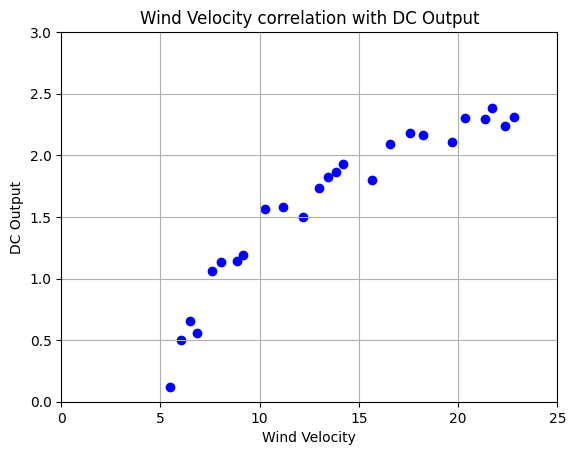

In [6]:
# print DC output vs wind velocity

plt.close()

plt.xlim(0, 25)
plt.ylim(0, 3)

plt.xlabel('Wind Velocity')
plt.ylabel('DC Output')
plt.title('Wind Velocity correlation with DC Output')

plt.scatter(df['WindVelocity'], df['DCOutput'], color='blue')

plt.grid()

plt.show()

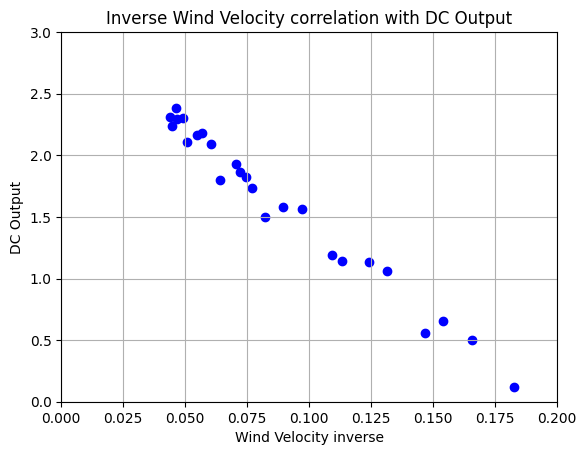

In [7]:
# print DC output vs inverse wind velocity

plt.close()

plt.xlim(0, 0.2)
plt.ylim(0, 3)

plt.xlabel('Wind Velocity inverse')
plt.ylabel('DC Output')
plt.title('Inverse Wind Velocity correlation with DC Output')

plt.scatter(df['InverseWindVelocity'], df['DCOutput'], color='blue')

plt.grid()

plt.show()

### b) Fit the model to the data. Give the estimated parameter values and the standard errors. (manual)

Model: DCOutput(WindVelocity) = β0 + β1 / WindVelocity

In [23]:
x_bar = df['InverseWindVelocity'].mean()
y_bar = df['DCOutput'].mean()

Sxx = np.sum((df['InverseWindVelocity'] - x_bar) ** 2)
Sxy = np.sum((df['InverseWindVelocity'] - x_bar) * (df['DCOutput'] - y_bar))
print(f"{Sxx=}, {Sxy=}")

# slope
beta_1 = Sxy / Sxx

# intercept
beta_0 = y_bar - beta_1 * x_bar
print(f"{beta_0=}, {beta_1=}")

# calculate estimated values
y_hat = beta_0 + beta_1 * df['InverseWindVelocity']

# get residuals
residuals = df['DCOutput'] - y_hat

# calulate mean of standard error
mean_residuals = np.mean(residuals)
print(f"{mean_residuals=}")

# caluclate standard deviation of residuals
sigma_2 = np.sum(residuals**2) * 1/(df.shape[0] - 2)
sigma = np.sqrt(sigma_2)
print(f"{sigma=}")


Sxx=0.04157040334238129, Sxy=-0.6449837996535777
beta_0=2.978860168120536, beta_1=-15.515456858606242
mean_residuals=2.3092638912203257e-16
sigma=0.09417137060906945


In [24]:
# calucalte everything with statsmodels
model = smf.ols('DCOutput ~ InverseWindVelocity', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               DCOutput   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1128.
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           4.74e-21
Time:                        15:29:58   Log-Likelihood:                 24.635
No. Observations:                  25   AIC:                            -45.27
Df Residuals:                      23   BIC:                            -42.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9789    

### c) Calculate the 99% confidence interval on β1.

In [26]:
beta_1_0 = 0
beta_1_hat = model.params['InverseWindVelocity']

# standard error of beta_1
se_beta_1 = model.bse['InverseWindVelocity']

# test statistic
test_beta_1 = (beta_1_hat - beta_1_0) / se_beta_1

# p-value
p_value = scp.stats.t.sf(np.abs(test_beta_1), df.shape[0] - 2) * 2

# print value
print(f"{test_beta_1=}, {p_value=}")

test_beta_1=-33.592149611021426, p_value=4.742556891123367e-21


In [27]:
alpha = 0.05
test_critical = scp.stats.t.ppf(1 - alpha/2, df.shape[0] - 2)
print(f"{test_critical=}")

test_critical=2.0686576104190406


Let's test abs(test_beta_1) > test_critical

In [28]:
if (np.abs(test_beta_1) > test_critical):
  print('Reject H0')
else:
  print('Do not reject H0')

Reject H0


**REMARKS:** We need to reject H0. This concludes that DCOutput depends significantly on InverseWindVelocity (using inverse of WindVelocity to better fit regression model).

### d) Add the best model to the scatter diagram DC output versus the inverse wind velocity. Give a physical interpretation of the parameters β0 and β1.

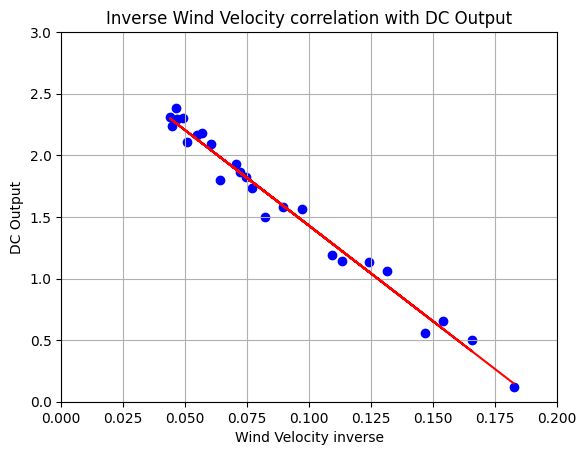

In [29]:
# print DC output vs inverse wind velocity

plt.close()

plt.xlim(0, 0.2)
plt.ylim(0, 3)

plt.xlabel('Wind Velocity inverse')
plt.ylabel('DC Output')
plt.title('Inverse Wind Velocity correlation with DC Output')

# plot scatterplot
plt.scatter(df['InverseWindVelocity'], df['DCOutput'], color='blue')

# plot regression line
plt.plot(df['InverseWindVelocity'], y_hat, color='red')

plt.grid()

plt.show()

e) Calculate the estimated DC output, the 95% confidence interval of the response and the 95% prediction interval with a wind velocity of one and ten metres per second. Comment your results.

In [36]:
# calculate DC Output for 1m/s wind velocity
dc_out_1 = model.predict({'InverseWindVelocity': 1/1})
print(f"{dc_out_1=}")

# manual calculation
dc_out_1_manual = beta_0 + beta_1 * 1/1
print(f"{dc_out_1_manual=}")

# calculate the confidence interval
x = 1/1
t_alpha = scp.stats.t.ppf(1 - alpha/2, df.shape[0] - 2)
se_hat = sigma * np.sqrt(1/df.shape[0] + (x - x_bar)**2 / Sxx)
ci = t_alpha * se_hat
print(f"{ci=}")

# calculate the prediction interval
pi = t_alpha * sigma * np.sqrt(1 + 1/df.shape[0] + (x - x_bar)**2 / Sxx)
print(f"{pi=}")


dc_out_1=0   -12.536597
dtype: float64
dc_out_1_manual=-12.536596690485707
ci=0.8720159653127608
pi=0.8935111226354652


In [54]:
# caluclate the DC Output for 10m/s wind velocity
dc_out_10 = model.predict({'InverseWindVelocity': 1/10})
print(f"{dc_out_10=}")

pred = model.get_prediction({'InverseWindVelocity': 1/10})

# get prediction details
summary = pred.summary_frame(alpha=0.05)

ci = [summary.mean_ci_lower.iloc[0], summary.mean_ci_upper.iloc[0]]
pi = [summary.obs_ci_lower.iloc[0], summary.obs_ci_upper.iloc[0]]

print(f"{ci=}, {pi=}")


dc_out_10=0    1.427314
dtype: float64
ci=[1.3867679462933062, 1.4678610182265186], pi=[1.2283313068609996, 1.6262976576588253]


**REMARKS:** For 10m/s wind velocity the DC output is estimated to be 1.427314 with a 95% confidence interval of [1.386, 1.467] and a 95% prediction interval of [1.228, 1.626]. The prediction interval is wider than the confidence interval because it also includes the uncertainty of the model.